In [2]:
import csv
import statistics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## Read data from csv files

In [4]:
# Define the file path
data_file = "results.csv"

# Arrays to store data
my_data_array = []
other_data_array = []

# Open the CSV files
with open(data_file, "r") as csv_file:
    csv_reader = csv.reader(csv_file)

    # Skip the header row if it exists
    next(csv_reader)

    # Read the data in the second column and store it in the array
    for row in csv_reader:
        my_data_array.append(float(row[1]))
        other_data_array.append(float(row[2]))

## Compute mean and std deviation for both sample sets

In [5]:
# Compute mean and standard deviation for both sets
my_mean = statistics.mean(my_data_array)
my_std_dev = statistics.stdev(my_data_array)

other_mean = statistics.mean(other_data_array)
other_std_dev = statistics.stdev(other_data_array)

# Print the results
print(f"My mean: {my_mean:.3f}\t\tOther mean: {other_mean:.3f}")
print(f"My standard deviation: {my_std_dev:.3f}\tOther standard deviation: {other_std_dev:.3f}")

My mean: 173.162		Other mean: 163.643
My standard deviation: 32.509	Other standard deviation: 32.095


## Configure usefull parameters

In [6]:
confidence = 0.95
alpha = 1 - confidence
left_alpha = alpha / 2
right_alpha = 1 - left_alpha

my_dof = len(my_data_array) - 1
other_dof = len(other_data_array) - 1

## Plot the Gaussian distribution of the data

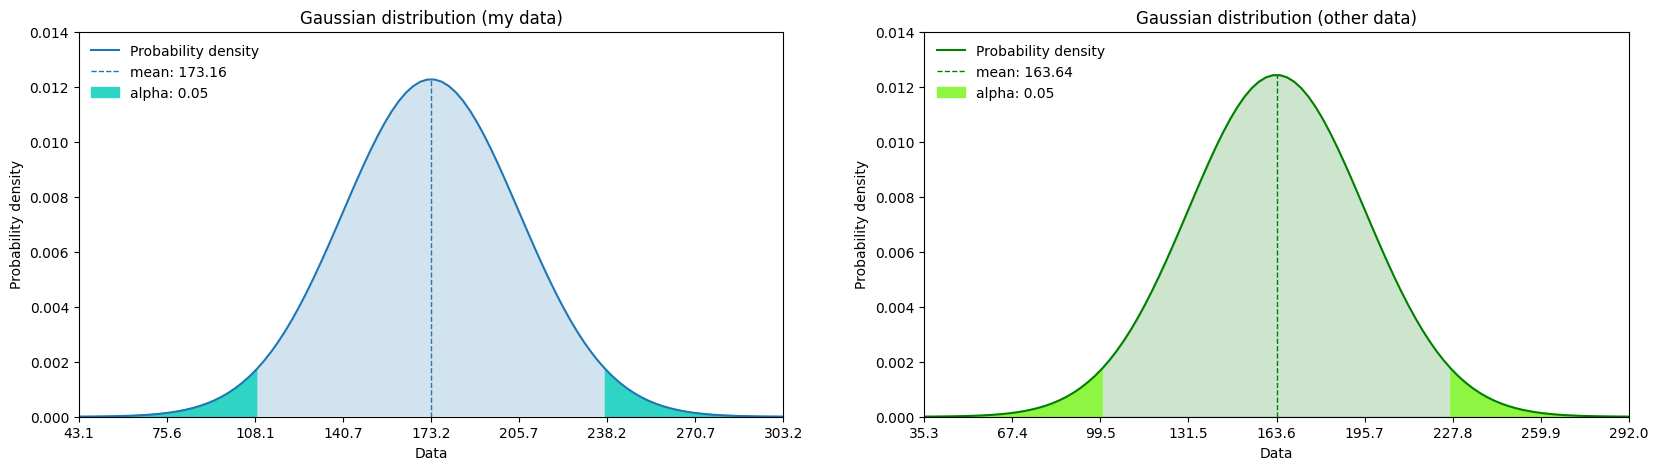

In [7]:
# Generate data points for the Gaussian distributions
x1_start = my_mean - 4 * my_std_dev
x1_end = my_mean + 4 * my_std_dev
x1 = np.linspace(x1_start, x1_end, 100)
y1 = norm.pdf(x1, my_mean, my_std_dev)

x2_start = other_mean - 4 * other_std_dev
x2_end = other_mean + 4 * other_std_dev
x2 = np.linspace(x2_start, x2_end, 100)
y2 = norm.pdf(x2, other_mean, other_std_dev)

# Plot the Gaussian distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(x1, y1, label="Probability density")
ax1.fill_between(x1, y1, alpha=0.2)

ax2.plot(x2, y2, label="Probability density", color='g')
ax2.fill_between(x2, y2, alpha=0.2, color='g')

# Plot mean line
ax1.vlines(x=my_mean, ymin=0, ymax=max(y1), linewidths=1, linestyle="--", label="mean: {:.2f}".format(my_mean))
ax2.vlines(x=other_mean, ymin=0, ymax=max(y2), linewidths=1, linestyle="--", label="mean: {:.2f}".format(other_mean), color='g')

# Plot alpha
y1_cdf = norm.cdf(x1, my_mean, my_std_dev)
y2_cdf = norm.cdf(x2, other_mean, other_std_dev)

ax1.fill_between(x1, y1, where=(y1_cdf <= left_alpha) | (y1_cdf >= right_alpha), color="#2FD4C5", label="alpha: {:.2f}".format(alpha))
ax2.fill_between(x2, y2, where=(y2_cdf <= left_alpha) | (y2_cdf >= right_alpha), color="#8EF542", label="alpha: {:.2f}".format(alpha))

ax1.set_xlim(x1_start, x1_end)
ax1.set_xticks(np.arange(x1_start, x1_end+1, my_std_dev))
ax1.set_ylim(0, 0.014)
ax1.set_yticks(np.arange(0, 0.015, 0.002))

ax2.set_xlim(x2_start, x2_end)
ax2.set_xticks(np.arange(x2_start, x2_end+1, other_std_dev))
ax2.set_ylim(0, 0.014)
ax2.set_yticks(np.arange(0, 0.015, 0.002))

ax1.set_title("Gaussian distribution (my data)")
ax1.set_xlabel("Data")
ax1.set_ylabel("Probability density")

ax2.set_title("Gaussian distribution (other data)")
ax2.set_xlabel("Data")
ax2.set_ylabel("Probability density")

ax1.legend(loc="upper left", frameon=False)
ax2.legend(loc="upper left", frameon=False)

plt.show()

## T-test

In [8]:
t_crit = 2.042

pooled_var = (my_dof * my_std_dev**2 + other_dof * other_std_dev**2) / (my_dof + other_dof)
pooled_se = np.sqrt(pooled_var * (1/len(my_data_array) + 1/len(other_data_array)))

t = (my_mean - other_mean) / pooled_se

print(f"Computed t value: {t:.3f}")
print(f"Reject the null hypotesis? {'Yes' if t > t_crit else 'No'}")

Computed t value: 1.141
Reject the null hypotesis? No
